In [1]:
import heapq

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize': (13, 9)})
sns.set(font_scale=1.7)

In [3]:
def generate_init(n_windows, alpha=1.0):
    return np.random.exponential(alpha, n_windows)

In [20]:
def plot_q2(n_windows=[100, 500, 1000, 3000],
            alphas=[0.25, 0.5, 1.0, 2.0, 4.0, 10.0],
            repeats=100):
    for n_w in n_windows:
        for alpha in alphas:
            M = []
            for _ in range(repeats):
                means = []
                g = generate_init(n_w, alpha)
                time = sorted(g)
                awaits = []
                q_r = list(range(n_w, 2 * n_w, 10))
                for q in q_r:
                    awaits.append(time[q - n_w])
                    means.append(np.mean(awaits))
                M.append(means)
            means = np.mean(M, axis=0)
            plt.plot(q_r, means, label=f'alpha = {alpha}')
        plt.title(f'Number of windows {n_w}, mean for queue')
        plt.xlabel('Queue length')
        plt.ylabel('Mean waiting time')
        #plt.yscale('log')
        plt.legend()
        plt.show()
    
    for n_w in n_windows:
        for alpha in alphas:
            M = []
            for _ in range(repeats):
                means = []
                g = generate_init(n_w, alpha)
                time = sorted(g)
                awaits = []
                q_r = list(range(n_w, 2 * n_w, 10))
                for q in q_r:
                    awaits.append(time[q - n_w])
                    means.append(time[q - n_w])
                M.append(means)
            means = np.mean(M, axis=0)
            plt.plot(q_r, means, label=f'alpha = {alpha}')
        plt.title(f'Number of windows {n_w}, mean for position')
        plt.xlabel('Position in queue')
        plt.ylabel('Mean waiting time')
        #plt.yscale('log')
        plt.legend()
        plt.show()
        

def plot_q(n_windows=[100, 500, 1000, 3000],
           alphas=[0.25, 0.5, 1.0, 2.0, 4.0, 10.0],
           repeats=100):
    for n_w in n_windows:
        for alpha in alphas:
            M = []
            for _ in range(repeats):
                means = []
                g = list(generate_init(n_w, alpha))
                heapq.heapify(g)
                awaits = []
                q_r = list(range(n_w, 4 * n_w, 40))
                for q in q_r:
                    t = heapq.heappop(g)
                    awaits.append(t)
                    means.append(np.mean(awaits))
                    heapq.heappush(g, t + np.random.exponential(alpha))
                M.append(means)
            means = np.mean(M, axis=0)
            plt.plot(q_r, means, label=f'alpha = {alpha}')
        plt.title(f'Number of windows {n_w}, mean for queu')
        plt.xlabel('Queue length')
        plt.ylabel('Mean waiting time')
        plt.legend()
        plt.show()

    for n_w in n_windows:
        for alpha in alphas:
            M = []
            for _ in range(repeats):
                means = []
                g = list(generate_init(n_w, alpha))
                heapq.heapify(g)
                awaits = []
                q_r = list(range(n_w, 4 * n_w, 40))
                for q in q_r:
                    t = heapq.heappop(g)
                    awaits.append(t)
                    means.append(t)
                    heapq.heappush(g, t + np.random.exponential(alpha))
                M.append(means)
            means = np.mean(M, axis=0)
            plt.plot(q_r, means, label=f'alpha = {alpha}')
        plt.title(f'Number of windows {n_w}, mean for position')
        plt.xlabel('Position in queue')
        plt.ylabel('Mean waiting time')
        plt.legend()
        plt.show()

Строим графики для случая, когда каждое окно может обслужить одного клиента. Кажется зависимость от количества окон не на столько интересна (просто значения будут больше, потому что меньше пропускная способность в принципе), поэтому я перебрал несколько вариантов -- $100, 500, 1000, 3000$. Гораздо интереснее зависимость от размера очереди, для каждого количества окон рассмотрены варианты очередей размера от количества окон до удвоенного количества окон (больше не обслужить). Эксперимент с каждым наборов параметров повторялся $100$ раз, чтобы уменьшить шум. Матожидание я считал для всех людей из очереди и для кажжой позиции в очереди отдельно (из задания я не понял какое из матожиданий считать). Зависимость матожидания от длины очереди нелинейна и для позиции в очереди кажется является экпоненциальной, а для всей очереди больше похоже на полином (даже если логарифмировать не очень понятно экпонента это или полином)

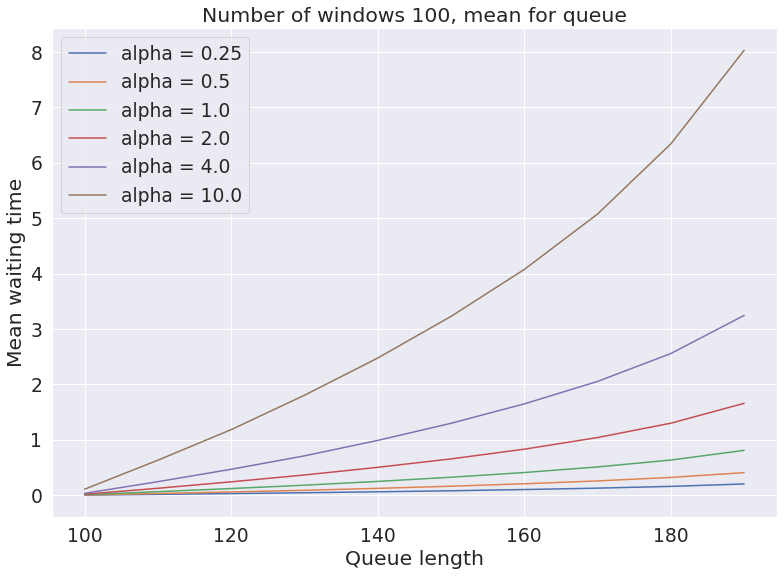

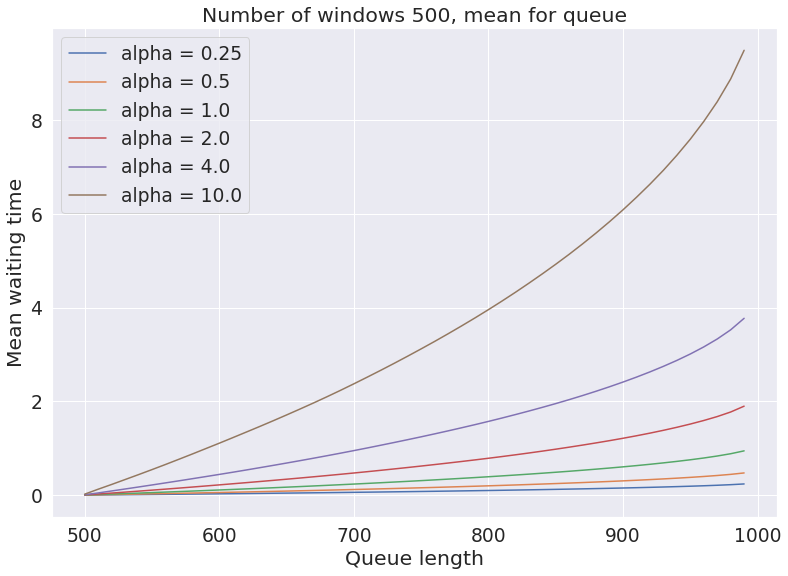

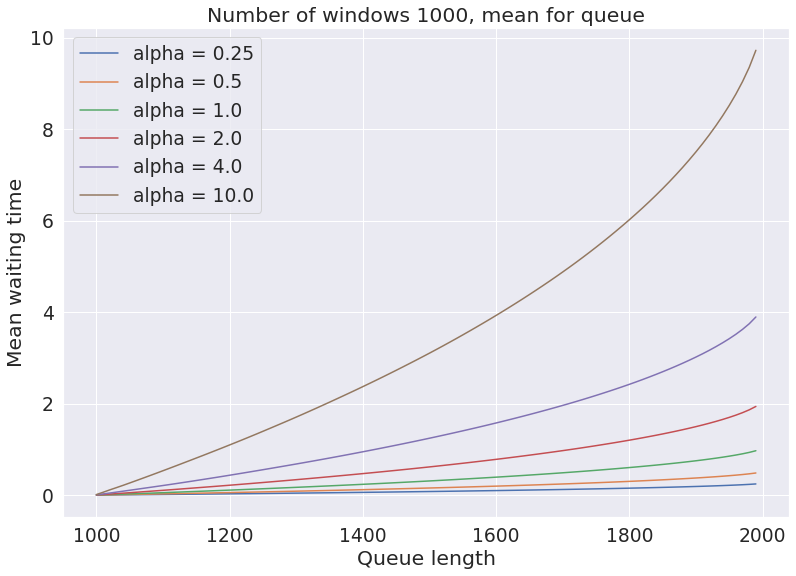

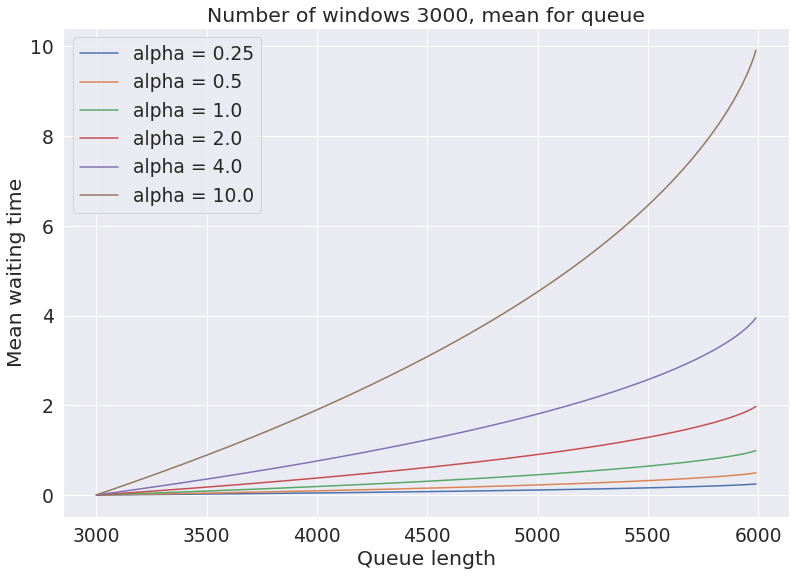

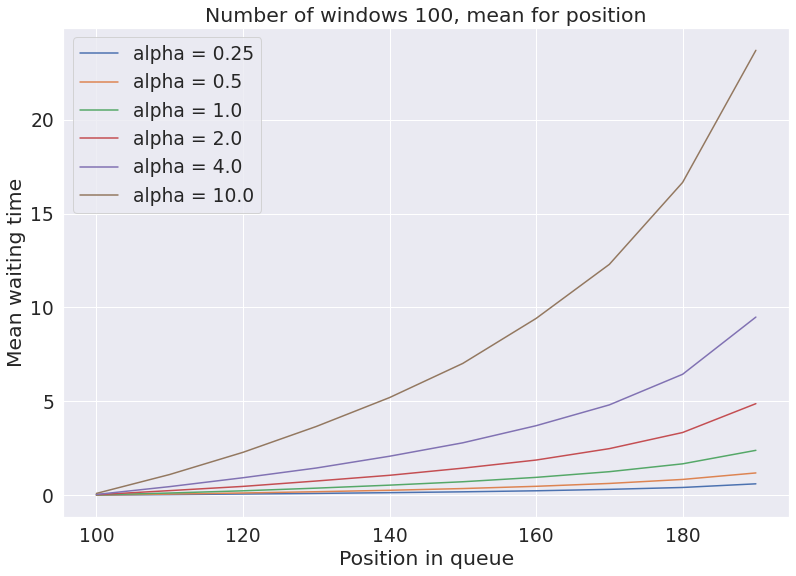

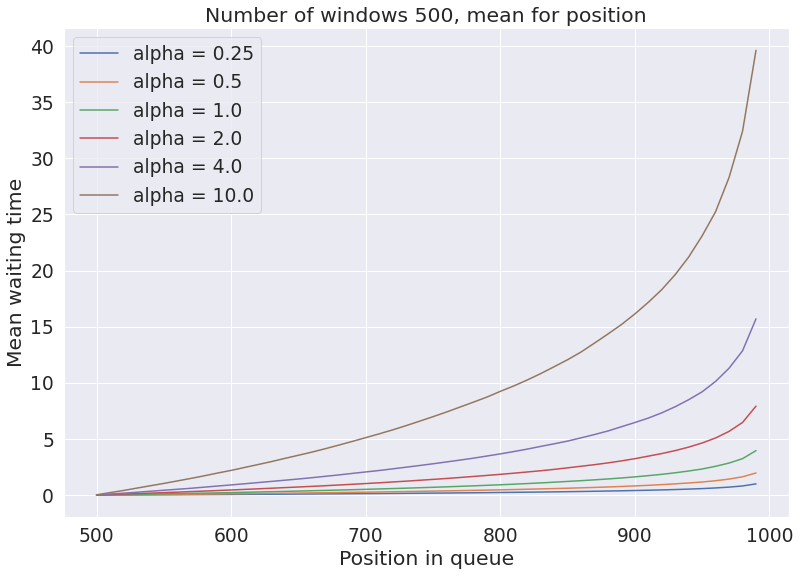

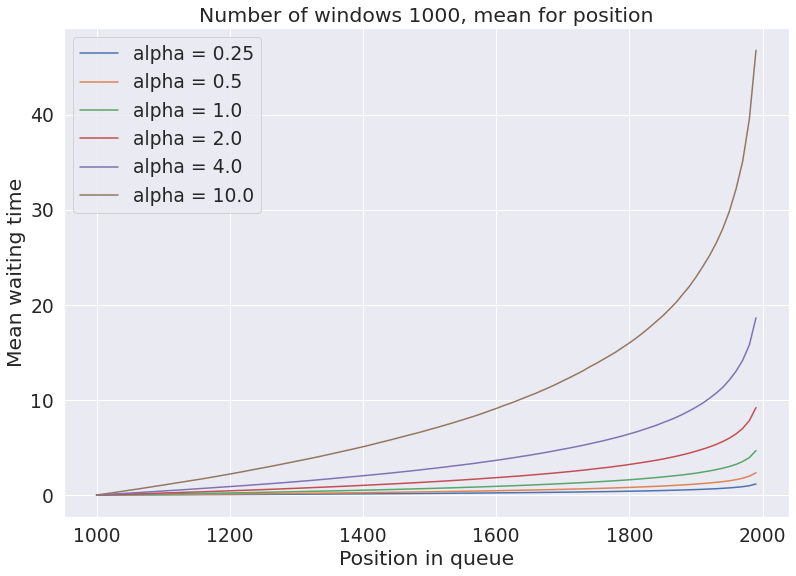

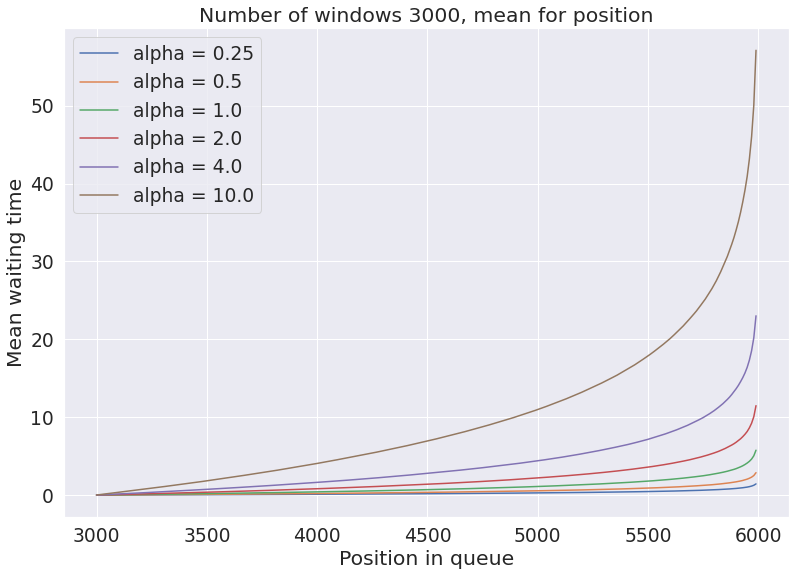

In [18]:
plot_q2()

Для неограниченного количества людей в одно окно параметры экспериментов такие же, только размер очереди теперь не удвоенное количество окон, а в $4$ раза больше, т.к. можно это позволить. Отличаются результаты -- оба матожидания становятся линейными

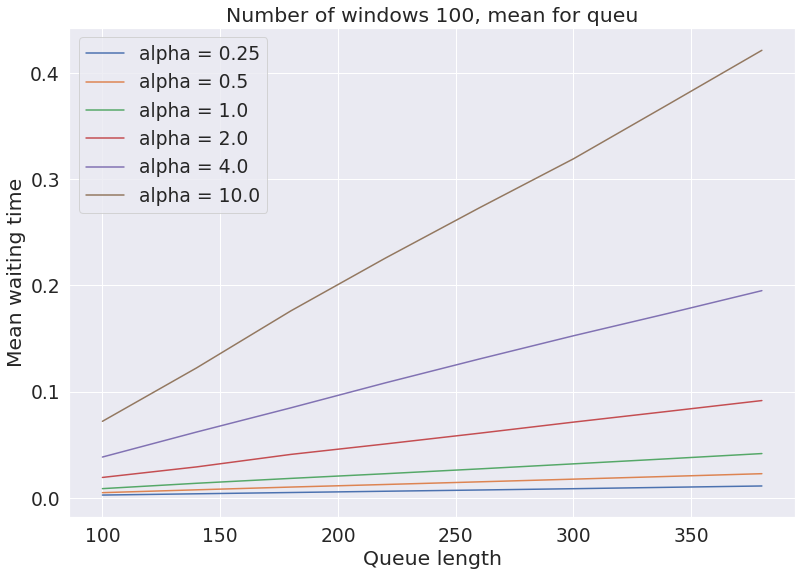

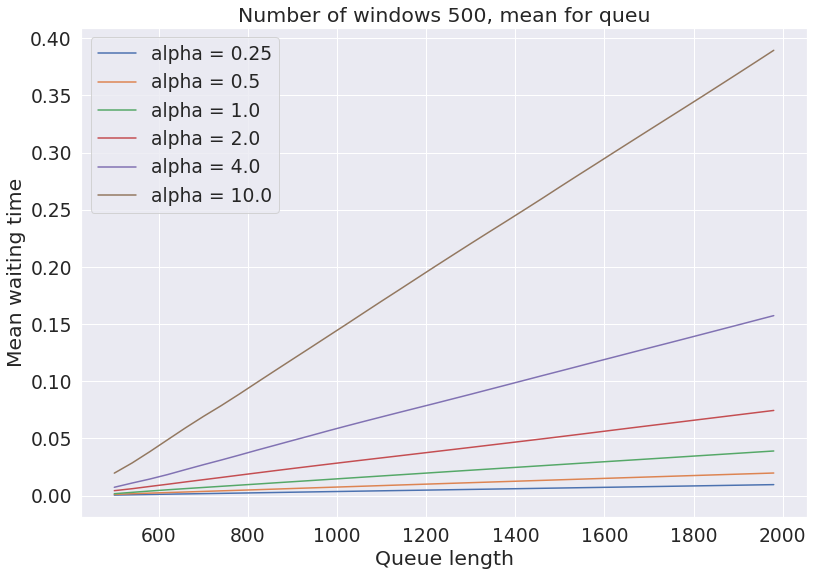

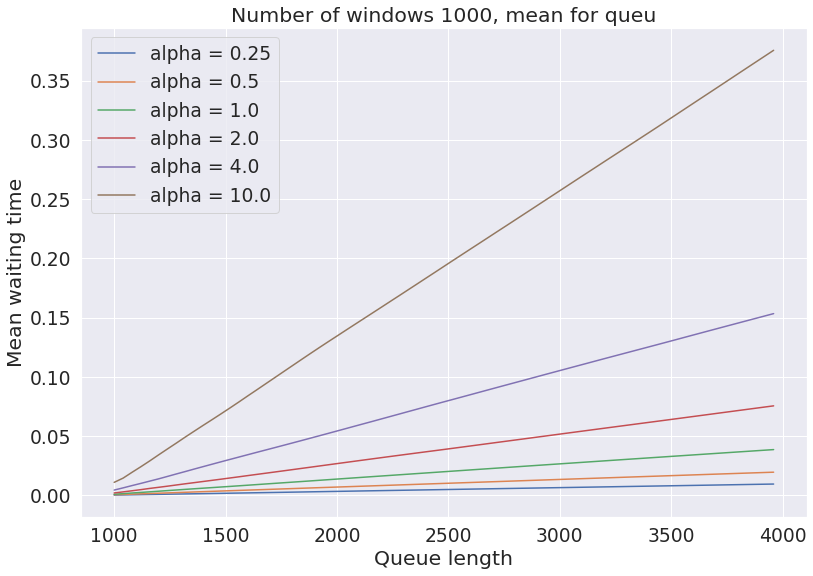

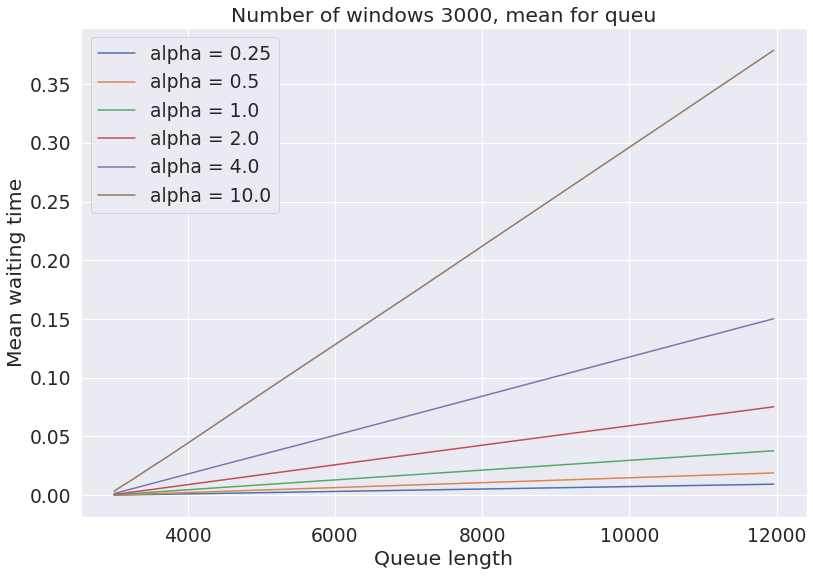

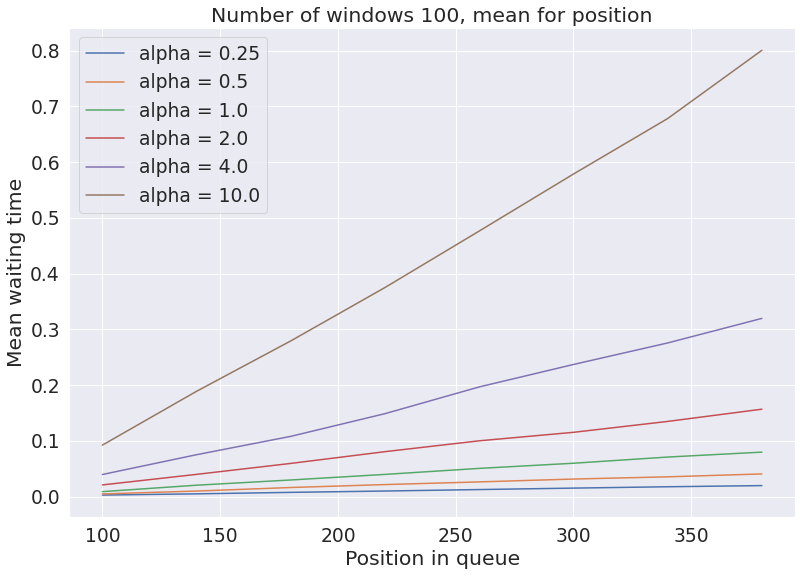

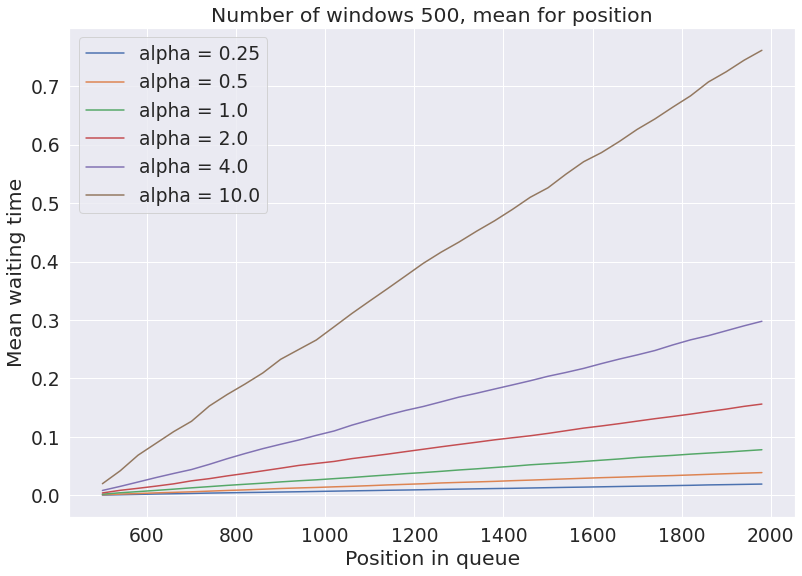

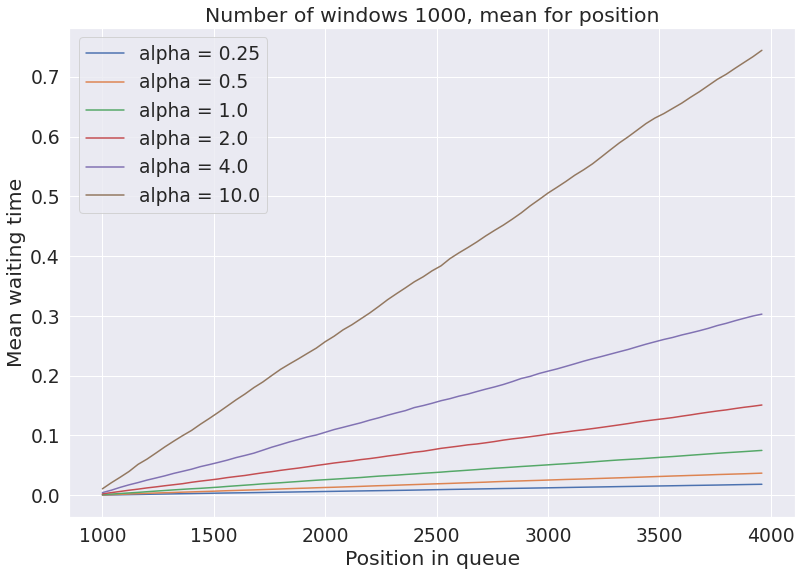

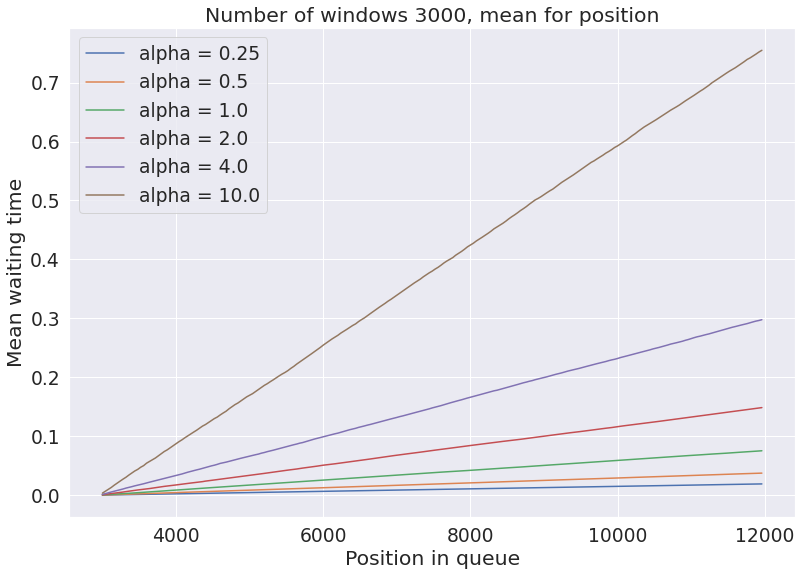

In [21]:
plot_q()